# Linear Regression

# Concept Session

## Demo 2.1 : Simple Linear Regression Analysis

### Importing the required Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
weather_df=pd.read_csv('DS1_C9_S2_Concept_BASEL_Weather_Data.csv')
weather_df

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0
...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6


### Understanding Data

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              3654 non-null   int64  
 1   MONTH             3654 non-null   int64  
 2   cloud_cover       3654 non-null   int64  
 3   humidity          3654 non-null   float64
 4   pressure          3654 non-null   float64
 5   global_radiation  3654 non-null   float64
 6   precipitation     3654 non-null   float64
 7   sunshine          3654 non-null   float64
 8   temperature       3654 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 257.1 KB


### Variables

Dependent Variable: temperature

Independent Variables: humidity, pressure, cloud_cover, global_radiation, precipitation, sunshine 

## Performing data preparation 
### 1. Missing value treatment

In [7]:
weather_df.isnull().sum()

DATE                0
MONTH               0
cloud_cover         0
humidity            0
pressure            0
global_radiation    0
precipitation       0
sunshine            0
temperature         0
dtype: int64

This data does not consist any missing value.

### 2. Outlier Treatment

In [9]:
# removing first two columns from the data

weather_df_c=weather_df

In [11]:
columns_to_drop=["DATE","MONTH"]
weather_df_c=weather_df_c.drop(columns_to_drop,axis=1)
weather_df_c

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,8,0.89,1.0286,0.20,0.03,0.0,2.9
1,8,0.87,1.0318,0.25,0.00,0.0,3.6
2,5,0.81,1.0314,0.50,0.00,3.7,2.2
3,7,0.79,1.0262,0.63,0.35,6.9,3.9
4,5,0.90,1.0246,0.51,0.07,3.7,6.0
...,...,...,...,...,...,...,...
3649,7,0.82,1.0084,0.28,0.42,0.3,3.2
3650,7,0.92,1.0028,0.22,1.68,0.2,4.5
3651,8,0.92,0.9979,0.07,1.54,0.0,8.5
3652,7,0.93,0.9958,0.17,0.57,0.1,6.6


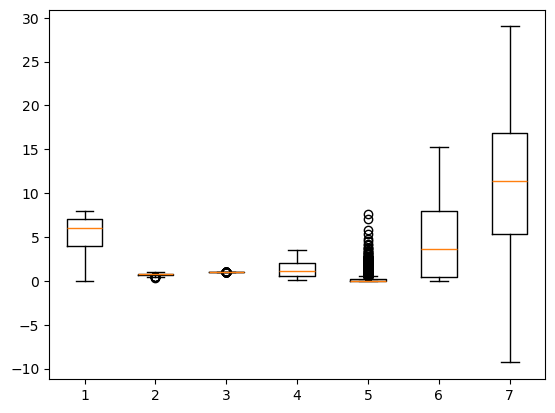

In [13]:
# Outlier Treatment
plt.boxplot(weather_df_c)
plt.show()

In [15]:
# Outlier Treatment
data=[]
for col in weather_df_c:
    lo=[]
    uo=[]
    column_df=pd.Series(weather_df_c[col])
    Max=max(column_df)
    Min=min(column_df)
    Range=Max-Min
    Q1=column_df.quantile(0.25)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in weather_df_c[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Max,Min,Range,Q1,Q3,IQR,UF,LF,[uo,lo]))
columns_names=["Columns","Max","Min","Range","Q1","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_names)
datas

,Columns,Max,Min,Range,Q1,Q3,IQR,UF,LF,Outliers
0,cloud_cover,8.0000,0.0000,8.0000,4.0000,7.0000,3.0000,11.5000,-0.5000,"[[], []]"
1,humidity,0.9800,0.3800,0.6000,0.6700,0.8300,0.1600,1.0700,0.4300,"[[], [0.38, 0.42, 0.4, 0.42, 0.42, 0.42, 0.43,..."
2,pressure,1.0408,0.9856,0.0552,1.0133,1.0227,0.0094,1.0368,0.9992,"[[1.0373, 1.0391, 1.0391, 1.0368, 1.0387, 1.03..."
3,global_radiation,3.5500,0.0500,3.5000,0.5300,2.0600,1.5300,4.3550,-1.7650,"[[], []]"
4,precipitation,7.5700,0.0000,7.5700,0.0000,0.2100,0.2100,0.5250,-0.3150,"[[0.65, 0.99, 1.27, 1.22, 0.9, 0.53, 0.56, 0.5..."
5,sunshine,15.3000,0.0000,15.3000,0.5000,8.0000,7.5000,19.2500,-10.7500,"[[], []]"
6,temperature,29.0000,-9.3000,38.3000,5.3000,16.9000,11.6000,34.3000,-12.1000,"[[], []]"


In [17]:
def outliers(col):
    ser=pd.Series(weather_df_c[col])
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    for z in ser:
        if z>uf or z<lf:
            weather_df_c[col]=weather_df_c[col].replace([z],weather_df_c[col].mean())

In [19]:
outliers('precipitation')
    

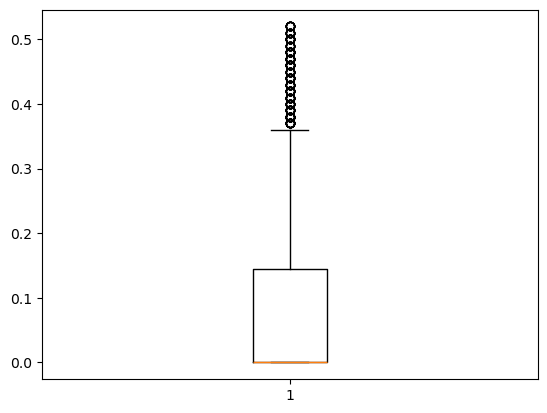

In [21]:
plt.boxplot(weather_df_c['precipitation'])
plt.show()

In [23]:
lst=[]
ser=pd.Series(weather_df_c['precipitation'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1
lf=q1-1.5*iqr
uf=q3+1.5*iqr
for z in ser:
    if z>uf or z<lf:
            lst.append(z)

In [25]:
print(lst)
len(lst)

[0.42, 0.44, 0.48, 0.39, 0.45, 0.42, 0.47, 0.37, 0.5, 0.52, 0.37, 0.38, 0.38, 0.45, 0.46, 0.5, 0.52, 0.44, 0.37, 0.48, 0.52, 0.43, 0.43, 0.4, 0.46, 0.47, 0.46, 0.45, 0.45, 0.45, 0.39, 0.42, 0.38, 0.48, 0.49, 0.46, 0.37, 0.49, 0.5, 0.46, 0.5, 0.45, 0.38, 0.42, 0.45, 0.38, 0.49, 0.43, 0.38, 0.44, 0.41, 0.46, 0.38, 0.47, 0.48, 0.46, 0.5, 0.44, 0.47, 0.48, 0.45, 0.44, 0.39, 0.44, 0.52, 0.37, 0.44, 0.51, 0.47, 0.38, 0.4, 0.44, 0.43, 0.51, 0.37, 0.42, 0.41, 0.39, 0.49, 0.4, 0.47, 0.4, 0.48, 0.5, 0.5, 0.46, 0.42, 0.47, 0.43, 0.44, 0.48, 0.41, 0.38, 0.5, 0.41, 0.39, 0.42, 0.41, 0.51, 0.48, 0.47, 0.48, 0.43, 0.43, 0.51, 0.51, 0.47, 0.37, 0.42, 0.41, 0.38, 0.38, 0.45, 0.52, 0.39, 0.48, 0.49, 0.39, 0.41, 0.44, 0.4, 0.41, 0.38, 0.39, 0.37, 0.48, 0.39, 0.49, 0.5, 0.46, 0.51, 0.41, 0.52, 0.47, 0.37, 0.51, 0.41, 0.48, 0.39, 0.4, 0.43, 0.4, 0.44, 0.38, 0.46, 0.47, 0.46, 0.5, 0.52, 0.37, 0.47, 0.5, 0.38, 0.46, 0.4, 0.37, 0.38, 0.48, 0.52, 0.43, 0.37, 0.42, 0.51, 0.4, 0.38, 0.49, 0.38, 0.42]


168

In [45]:
# Outlier Treatment
data=[]
for col in weather_df_c:
    lo=[]
    uo=[]
    column_df=pd.Series(weather_df_c[col])
    Max=max(column_df)
    Min=min(column_df)
    Range=Max-Min
    Q1=column_df.quantile(0.25)
    Q3=column_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in weather_df_c[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Max,Min,Range,Q1,Q3,IQR,UF,LF,[uo,lo]))
columns_names=["Columns","Max","Min","Range","Q1","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_names)
datas

,Columns,Max,Min,Range,Q1,Q3,IQR,UF,LF,Outliers
0,cloud_cover,8.0000,0.0000,8.0000,4.0000,7.0000,3.0000,11.5000,-0.5000,"[[], []]"
1,humidity,0.9800,0.3800,0.6000,0.6700,0.8300,0.1600,1.0700,0.4300,"[[], [0.38, 0.42, 0.4, 0.42, 0.42, 0.42, 0.43,..."
2,pressure,1.0408,0.9856,0.0552,1.0133,1.0227,0.0094,1.0368,0.9992,"[[1.0373, 1.0391, 1.0391, 1.0368, 1.0387, 1.03..."
3,global_radiation,3.5500,0.0500,3.5000,0.5300,2.0600,1.5300,4.3550,-1.7650,"[[], []]"
4,precipitation,0.2900,0.0000,0.2900,0.0000,0.1000,0.1000,0.2500,-0.1500,"[[0.29, 0.28, 0.26, 0.28, 0.28, 0.27, 0.26, 0...."
5,sunshine,15.3000,0.0000,15.3000,0.5000,8.0000,7.5000,19.2500,-10.7500,"[[], []]"
6,temperature,29.0000,-9.3000,38.3000,5.3000,16.9000,11.6000,34.3000,-12.1000,"[[], []]"


### 3. Data Scaling

### Scale the data using Standard Scaler

In [36]:
# Read new data to predict using model
new_data=pd.read_csv('DS1_C9_S2_Concept_New_Data.csv')
new_data

,DATE,MONTH,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,20240426,4,9,0.77,1.007,0.1,0.08,4.2,9


In [38]:
new_data=new_data.drop(['DATE','MONTH'],axis=1)
new_data

,cloud_cover,humidity,pressure,global_radiation,precipitation,sunshine,temperature
0,9,0.77,1.007,0.1,0.08,4.2,9


In [47]:
new_data = pd.concat([weather_df_c, new_data],ignore_index=True)
new_data


TypeError: cannot concatenate object of type '<class 'bool'>'; only Series and DataFrame objs are valid

In [26]:
# Append the new row to the original DataFrame



In [27]:
# Standardizing data together


### Extract out the new data from the origial data after scalling, which will be used for prediction

In [29]:
# Extract the last row index


# Extract the last row using iloc and store in a new DataFrame


# Reshape the extracted Series into a DataFrame (optional)


In [30]:
# Retrieve original data by excluding new data


### 4. Feature Selection
### Pearson correlation coefficient: To find the correlation between different variables in data
#### Positive Correlation: If variable A increases, then variable B also increases and vice-versa.
#### Negative Correlation: If variable A increases, then variable B decreases and vice-versa.
#### Zero value means no correlation. 


In [32]:
# Plotting heatmap



In [33]:
# To show the correlation values from most negatively correlated to the most positively correlated.


### Decision:
### The value of Pearson correlation coefficient can vary from -1 to 1.   

In [35]:
# Feature selection based on correlation



## Temperature Prediction (one single feature at one time in case of simple linear regression)

### 1. Temperature Prediction using 'global_radiation'

#### Visualization of Data

#### Splitting data

##### Calculation of a and b for full data

In [41]:
# Build model and fit with data


In [42]:
# print intercept and slope of the model


### Predict the model

In [44]:
# Predict the model using test data


## Evaluating the model performance

In [46]:
# Evaluate MSE, MAE, RMSE


In [47]:
# Evaluate R2 Score


### Predicting new data 

In [49]:
# Reshape the new data into a 2D array for prediction


In [50]:
# Predict the target value for the new data


# Print the predicted value


In [51]:
# Original value of the new data to compare


## Model Assumptions

### Checking for Linear Relationship

Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.

In [55]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    pass

def linear_assumption(model, features, label):
    pass
    


In [56]:
# call the function


Interpretation: 
    

###  Checking Homoscedasticity: Plot the residuals of linear regression
Homoscedasticity: Residuals have equal or almost equal variance across the regression line. There should not be any pattern in the error terms. It can be checked by plotting the error terms with predicted terms.

In [59]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    pass

In [60]:
# call the function


Interpretation: 


### Error Normality curve

Interpretation:

### Plot for data with Regression Line

## Overall Interpretation
